In [11]:
import pandas as pd
import numpy as np

sizes = [1000, 10000, 100000, 1000000]

data = []
for size in sizes:
    with open(f"scalability_new/adult_{size}_time_exclude_insert_db.log") as f:
        lines = f.readlines()
        for line in lines:
            times = [size]
            times += [float(x) for x in line.split(", ")]
            data.append(times)

df = pd.DataFrame(data=data, columns=["size", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,size,Q1,Q2,Q3,Q4,Q5
0,1000,0.707661,3.375780,1.492811,0.556431,0.973016
1,1000,0.721065,2.435304,1.284102,0.690653,0.970388
2,1000,0.721124,1.787258,0.555390,0.960579,NaN
3,1000,0.716960,1.552635,0.557683,0.967189,NaN
4,1000,0.716482,1.789169,0.882736,0.544706,0.970762
5,1000,0.734623,2.325486,1.349741,0.550331,0.972813
6,1000,0.723718,2.331516,0.550637,0.974574,NaN
7,1000,0.737991,2.059546,1.962690,0.552643,0.978262
8,1000,0.706207,2.060477,1.029308,0.569661,0.978022
9,1000,0.725897,2.624353,1.160837,0.555766,1.046139


In [12]:
df = df.melt(id_vars="size", var_name="query", value_name="time")
df

,size,query,time
0,1000,Q1,0.707661
1,1000,Q1,0.721065
2,1000,Q1,0.721124
3,1000,Q1,0.716960
4,1000,Q1,0.716482
...,...,...,...
200,1000000,Q5,4103.962787
201,1000000,Q5,4115.022343
202,1000000,Q5,4162.547179
203,1000000,Q5,4174.086568


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.6)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

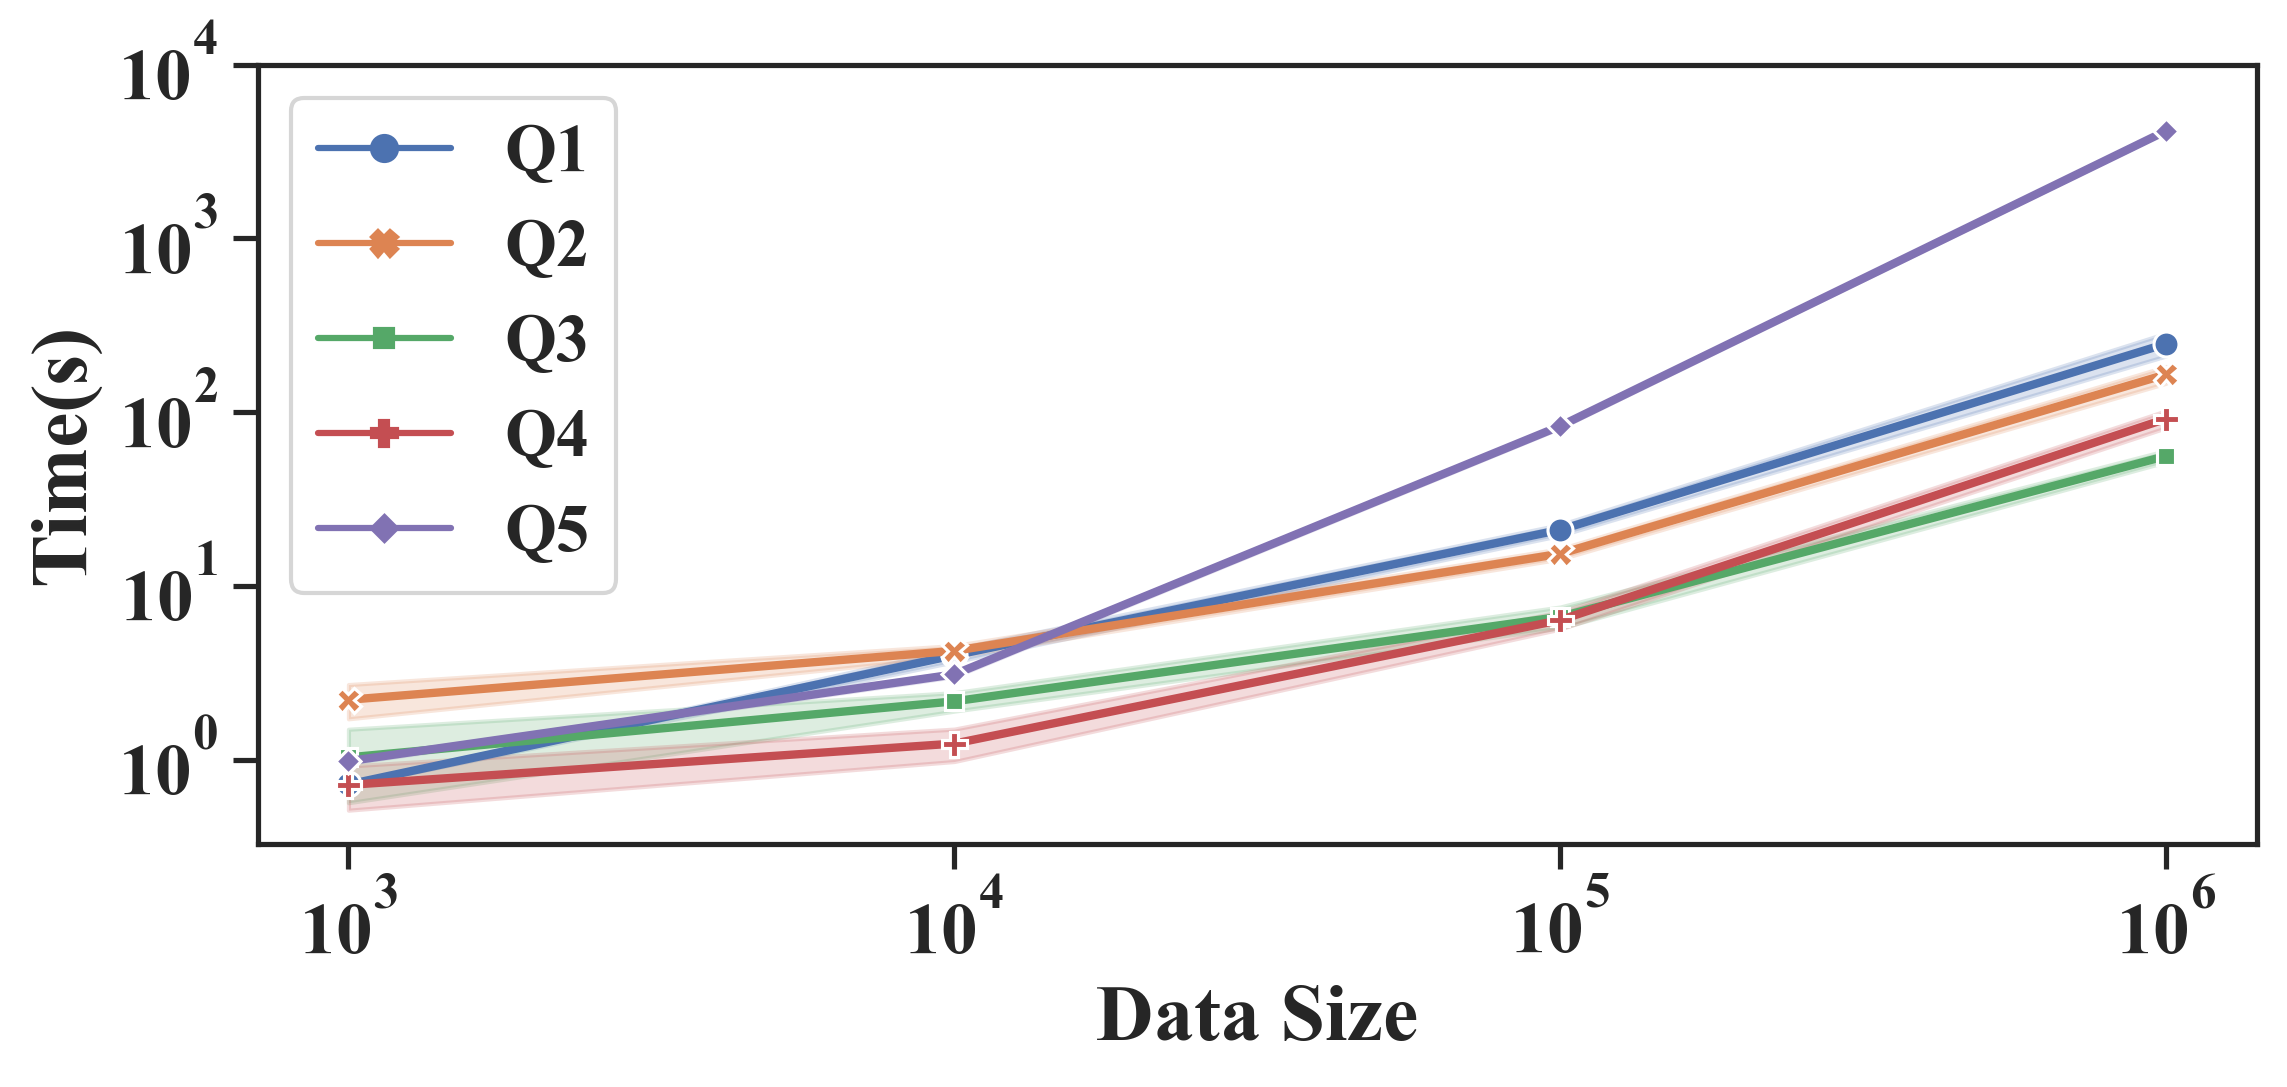

In [15]:
plt.rcParams["figure.figsize"] = [8, 4]

g = sns.lineplot(
    data=df, x="size", y="time", hue="query", err_style="band", errorbar="sd", style="query", markers=True, dashes=False, linewidth=2)
g.set_yscale("log")
g.set_xscale("log")
_ = g.set_yticks([1, 10, 100, 1000, 10000])
_ = g.set(xlabel="Data Size", ylabel="Time(s)")
plt.legend(fontsize='small', title_fontsize='small')
plt.minorticks_off()
g.legend_.set_title(None)
plt.tight_layout()
plt.savefig("figures/scalability_new.pdf", bbox_inches = 'tight', pad_inches = 0.05)
plt.show()
plt.close()

In [38]:
data = []
for size in sizes:
    with open(f"scalability_num_runs_1/adult_{size}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [size]
            split = line.split(", ")
            for eps in split:
                if eps == "None":
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["size", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,size,Q1,Q2,Q3,Q4,Q5
0,1000,10.0,7.0,0.7,9.0,10.0
1,1000,10.0,7.0,0.9,10.0,10.0
2,1000,10.0,3.0,5.0,10.0,10.0
3,1000,10.0,3.0,NaN,9.0,10.0
4,1000,10.0,4.0,1.0,10.0,10.0
5,1000,10.0,3.0,2.0,10.0,10.0
6,1000,10.0,4.0,0.8,10.0,10.0
7,1000,10.0,5.0,3.0,10.0,10.0
8,1000,10.0,4.0,NaN,9.0,10.0
9,1000,10.0,2.0,0.7,9.0,10.0


In [39]:
df = df.melt(id_vars="size", var_name="query", value_name="epsilon")
df

,size,query,epsilon
0,1000,Q1,10.0
1,1000,Q1,10.0
2,1000,Q1,10.0
3,1000,Q1,10.0
4,1000,Q1,10.0
...,...,...,...
195,1000000,Q5,10.0
196,1000000,Q5,10.0
197,1000000,Q5,5.0
198,1000000,Q5,10.0


In [1]:
import pandas as pd
df6 = pd.read_csv("../adult.csv")
pd.get_dummies(df6).size

3581710

In [2]:
df6.size

488415

In [3]:
df6["fnlwgt"].max()

1484705

In [4]:
df6["fnlwgt"].min()

12285

In [5]:
df6["fnlwgt"].max() - df6["fnlwgt"].min()

1472420

In [10]:
df = pd.read_csv("../scalability/adult_1000000.csv")
df["fnlwgt"].nunique()

60966